### 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### 2: Load Dataset

In [7]:
data= pd.read_csv('Housing.csv')

### 3: Explore the Data

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
#concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
# Get descriptive statistics for numerical columns
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
# Check for missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 4. Initial Visualizations

##### A) Furnishing Status Distribution

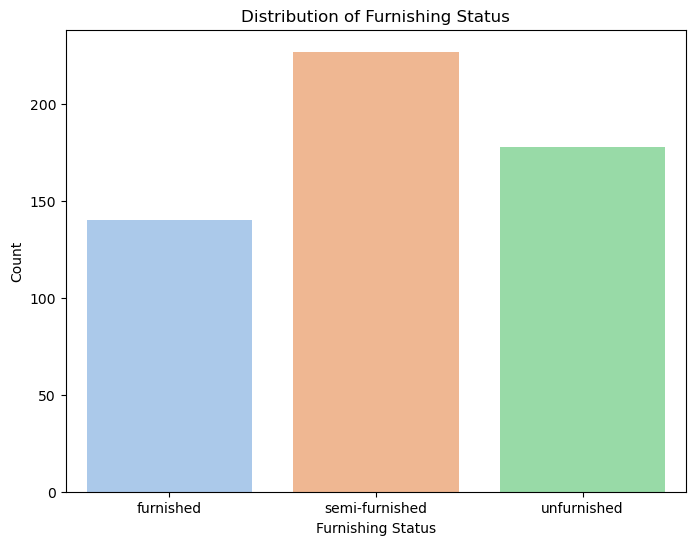

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='furnishingstatus', palette='pastel')
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

##### B) Box Plot of Price by Stories

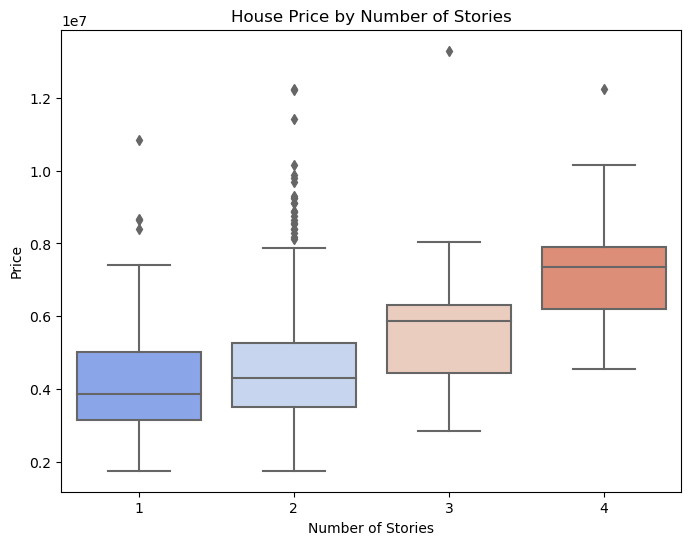

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='stories', y='price', palette='coolwarm')
plt.title('House Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.show()

##### C) Summary of Price Statistics

In [14]:
price_summary = data['price'].describe()
print("Price Summary Statistics:\n", price_summary)

Price Summary Statistics:
 count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


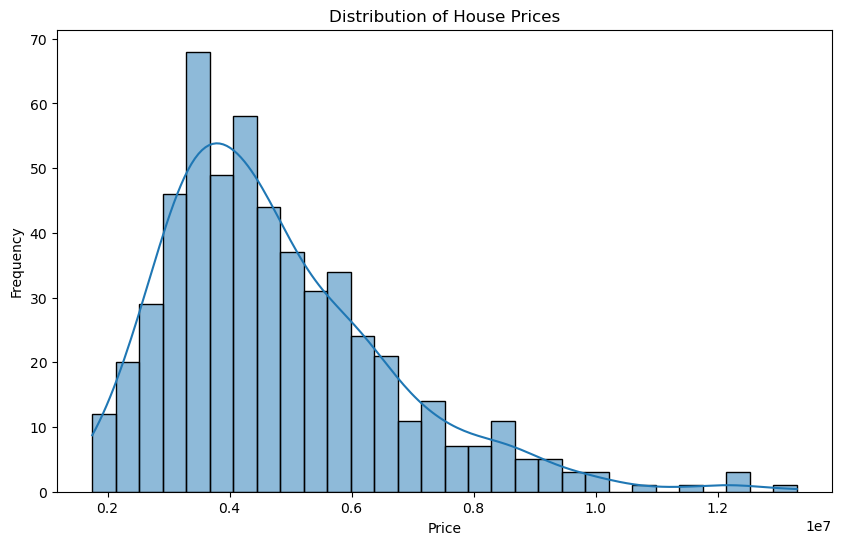

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 5: Feature Selection

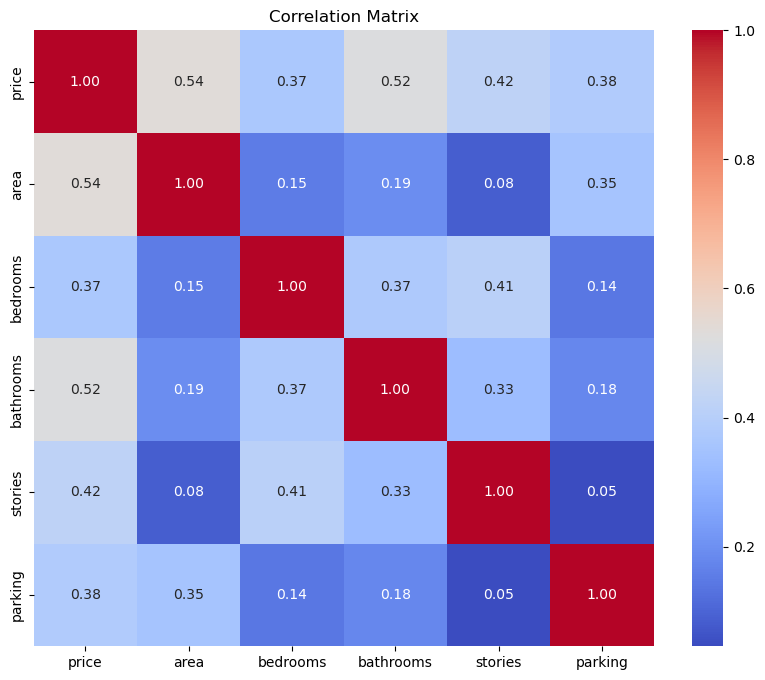

In [16]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8)) 
correlation_matrix = data.corr()  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show() 

In [17]:
# Select features based on correlation (example features based on the given dataset)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Example selected features from the dataset
y = data['price']  

###  6: Split the Data

In [18]:
 # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7: Train the Model

In [19]:
model = LinearRegression()  # Instantiate the linear regression model
model.fit(X_train, y_train)  # Fit the model to the training data

LinearRegression()

### 8: Make Predictions

In [20]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

### 9: Evaluate the Model

In [21]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  
print(f'Mean Squared Error: {mse}')  
print(f'R-squared: {r2}')  

Mean Squared Error: 2292721545725.361
R-squared: 0.5464062355495874


### 10: Visualize Results

##### A) Scatter Plot of Actual vs. Predicted Prices

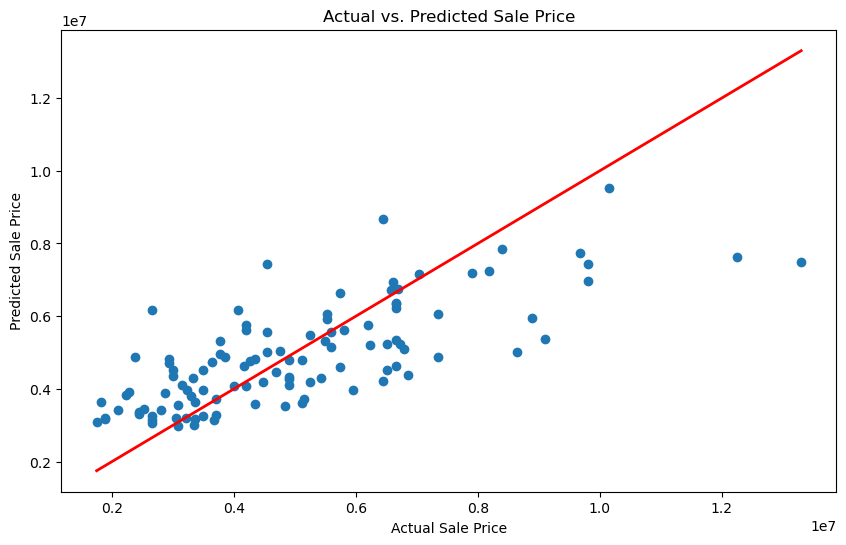

In [22]:
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred)  
plt.xlabel('Actual Sale Price')  
plt.ylabel('Predicted Sale Price')  
plt.title('Actual vs. Predicted Sale Price')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

##### B) Residuals Plot

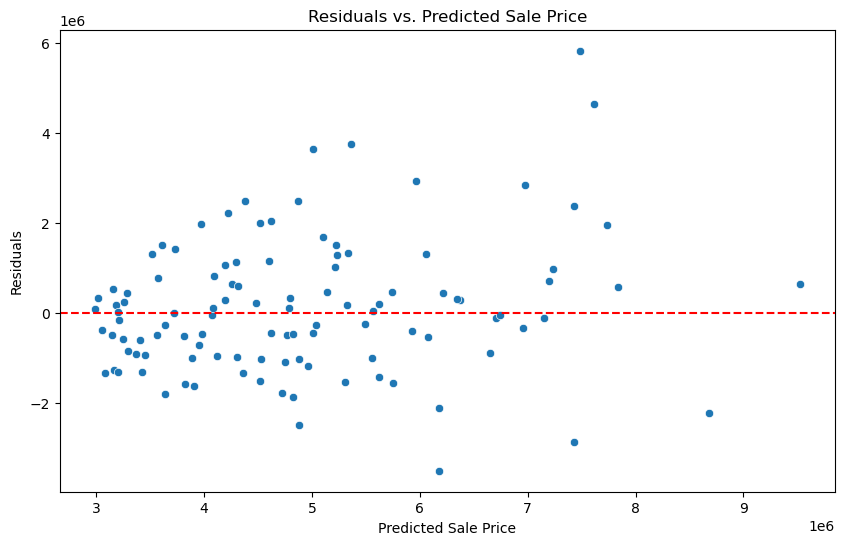

In [23]:
plt.figure(figsize=(10, 6))  
residuals = y_test - y_pred  
sns.scatterplot(x=y_pred, y=residuals) 
plt.axhline(0, color='red', linestyle='--')  
plt.xlabel('Predicted Sale Price')  
plt.ylabel('Residuals')  
plt.title('Residuals vs. Predicted Sale Price') 
plt.show() 

##### C) Histogram of Residuals

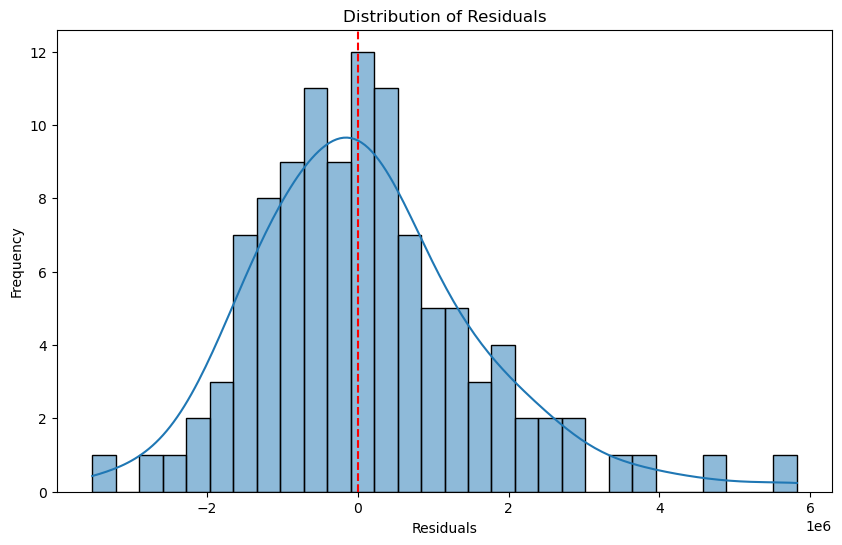

In [24]:
plt.figure(figsize=(10, 6))  
sns.histplot(residuals, bins=30, kde=True)  
plt.axvline(0, color='red', linestyle='--') 
plt.title('Distribution of Residuals')  
plt.xlabel('Residuals')  
plt.ylabel('Frequency') 
plt.show() 

##### D) Feature Distributions

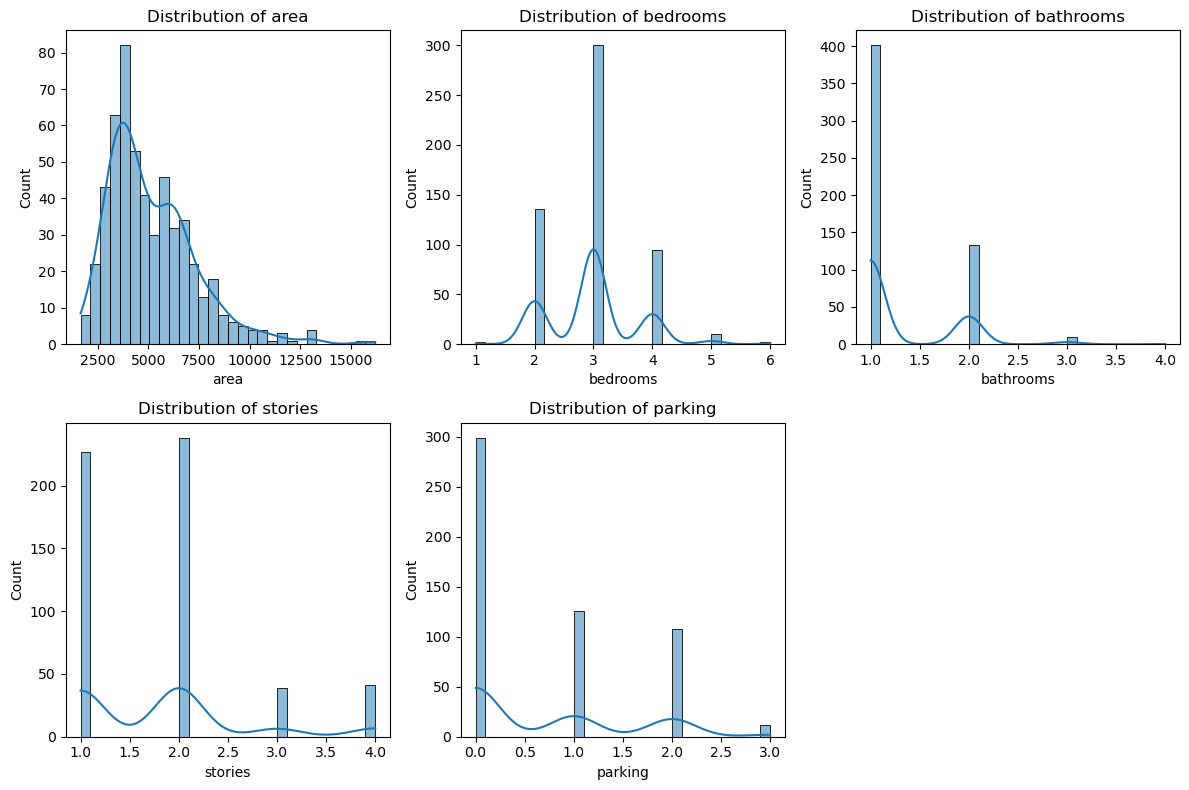

In [25]:
plt.figure(figsize=(12, 8))  
for i, feature in enumerate(X.columns):  
    plt.subplot(2, 3, i + 1)  
    sns.histplot(data[feature], bins=30, kde=True) 
    plt.title(f'Distribution of {feature}')  
plt.tight_layout()  
plt.show()

# Key Insights

1. Mean Squared Error (MSE): The high MSE **(2,292,721,545,725.36)** suggests that the model's predictions have large errors when compared to actual house prices. This could be due to the large scale of price values.



2. R-squared Value **(0.546)**: The model explains about 54.6% of the variation in house prices based on the selected features. While it's capturing some relationships, nearly half of the variance remains unexplained.



3. Improvement Needed: The model could be improved by trying additional features, refining the current ones, or exploring different modeling techniques to increase accuracy and reduce errors.





                                                       THANK YOU! 

In [ ]:
                                                    SHAIK TOUSIF ADNAN